# CoCo Fits
___

## ./lcfit Visual inspection

In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# reload(pcc) ## FOR DEV
# reload(pcc.defaults)
# reload(pcc.functions)

SN2015U


<IPython.core.display.Javascript object>


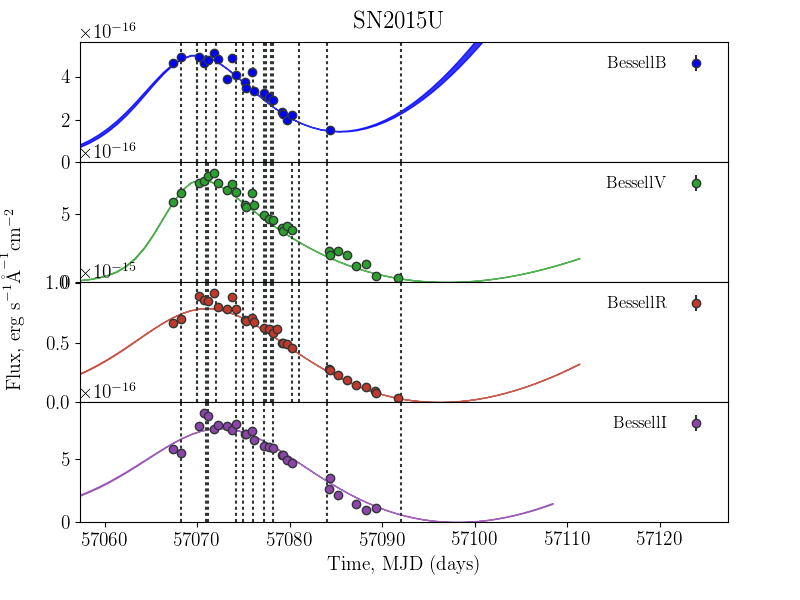

In [15]:
plot_out_dir = "/Users/berto/plots/CoCo-pycoco-debugging/"

sn_to_check = ["SN1993J",
"SN1994I",
"SN1996cb",
"SN1998bw",
"SN1999dn",
"SN2002ap",
"SN2003jd",
"SN2004aw",
"SN2005bf",
"SN2005hg",
"SN2006aj",
"SN2007C",
"SN2007Y",
"SN2007uy",
"SN2007gr",
"SN2008D",
"SN2008bo",
"SN2008ax",
"SN2009bb",
"SN2009er",
"SN2009iz",
"SN2009jf",
"SN2010al",
"SN2010as",
"SN2011bm",
"SN2011dh",
"SN2011ei",
"SN2011fu",
"SN2012ap",
"SN2013ge",
"iPTF13bvn"]

# sn_to_check = ["SN1998bw",]
# sn_to_check = ["SN2006aj",]
# sn_to_check = ["SN2007uy",]
# sn_to_check = ["SN2011dh",]
# sn_to_check = ["SN1994I",]
# sn_to_check = ["SN2002ap",]
# sn_to_check = ["SN2009jf",]
sn_to_check = ["SN2015U",]


for snname in sn_to_check:
    sn = pcc.classes.SNClass(snname)
    sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
    try:
        sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))
    except:
        pass
    sn.load_spec()
    sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
    sn.check_overlaps()
    print(sn.name)
#     sn.plot_lc()    
#     sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"karpenka10"), showsnname=True)
    sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(["SDSS_g"], xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_kessler10"), showsnname=True, multiplot=False)

In [3]:
pcc.get_max_info(sn, "BessellB")

(array([ 55729.36099995]), 3.2967385172649222e-14)

In [4]:
plt.scatter(sn.phot.data["BessellB"]["MJD"], sn.phot.data["BessellB"]["flux"] - sn.lcfit.spline["BessellB"](sn.phot.data["BessellB"]["MJD"]))

<IPython.core.display.Javascript object>


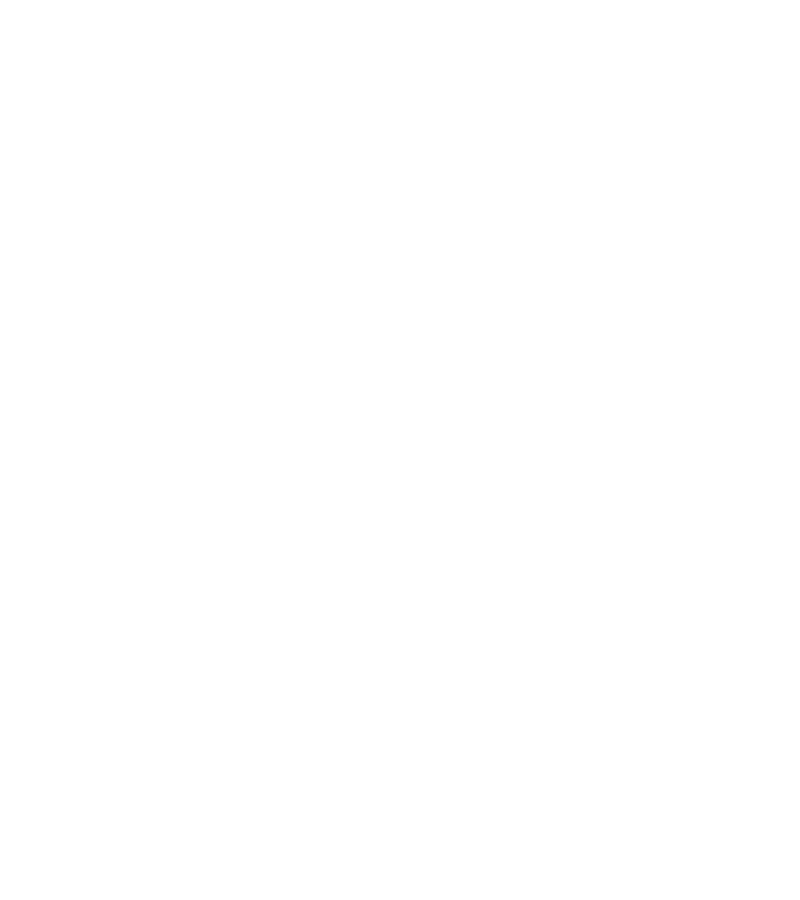

In [5]:
sn = pcc.classes.SNClass("SN2008D")
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/SN2008D.dat"))
sn.plot_lc()

In [6]:
sn = pcc.classes.SNClass("SN2006aj")
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path,"lc/SN2006aj.dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, "SN2006aj.list"))
sn.load_spec()
# sn.check_overlaps()

<IPython.core.display.Javascript object>


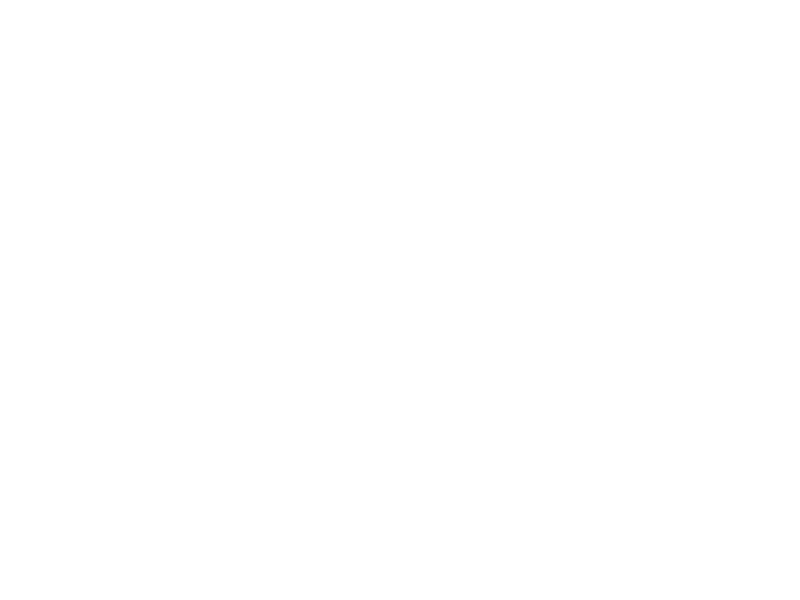

In [7]:
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, "SN2006aj.dat"))
sn.plot_lc()

<IPython.core.display.Javascript object>


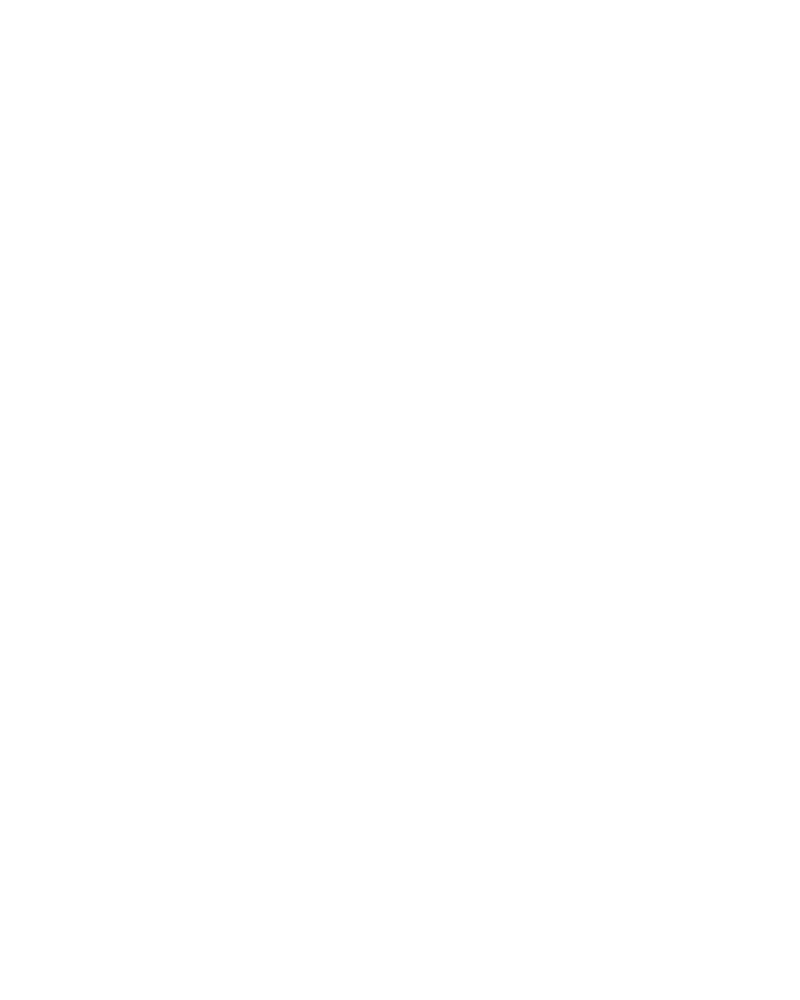

In [8]:
sn.plot_spec()

/Users/berto/Code/verbose-enigma/pycoco/classes.py:221: UserWarning: WARNING: You passed something that was <class 'numpy.str_'>This might go wrong.
  StringWarning(filename)


['data/spec/SN2006aj/2006aj_-7.93.txt']
['data/spec/SN2006aj/2006aj_-6.97.txt']
['data/spec/SN2006aj/2006aj_-6.0.txt']
['data/spec/SN2006aj/2006aj_-5.03.txt']
['data/spec/SN2006aj/2006aj_-4.06.txt']
['data/spec/SN2006aj/2006aj_-3.1.txt']
['data/spec/SN2006aj/2006aj_-2.13.txt']
['data/spec/SN2006aj/2006aj_-1.16.txt']
['data/spec/SN2006aj/2006aj_-0.19.txt']
['data/spec/SN2006aj/2006aj_0.77.txt']
['data/spec/SN2006aj/2006aj_1.74.txt']
['data/spec/SN2006aj/2006aj_2.71.txt']
['data/spec/SN2006aj/2006aj_3.68.txt']
['data/spec/SN2006aj/2006aj_4.64.txt']
['data/spec/SN2006aj/2006aj_5.61.txt']
['data/spec/SN2006aj/2006aj_7.55.txt']
['data/spec/SN2006aj/2006aj_8.52.txt']
['data/spec/SN2006aj/2006aj_9.48.txt']
['data/spec/SN2006aj/SN2006aj_vlt_2006_03_10_z0.dat']


<IPython.core.display.Javascript object>


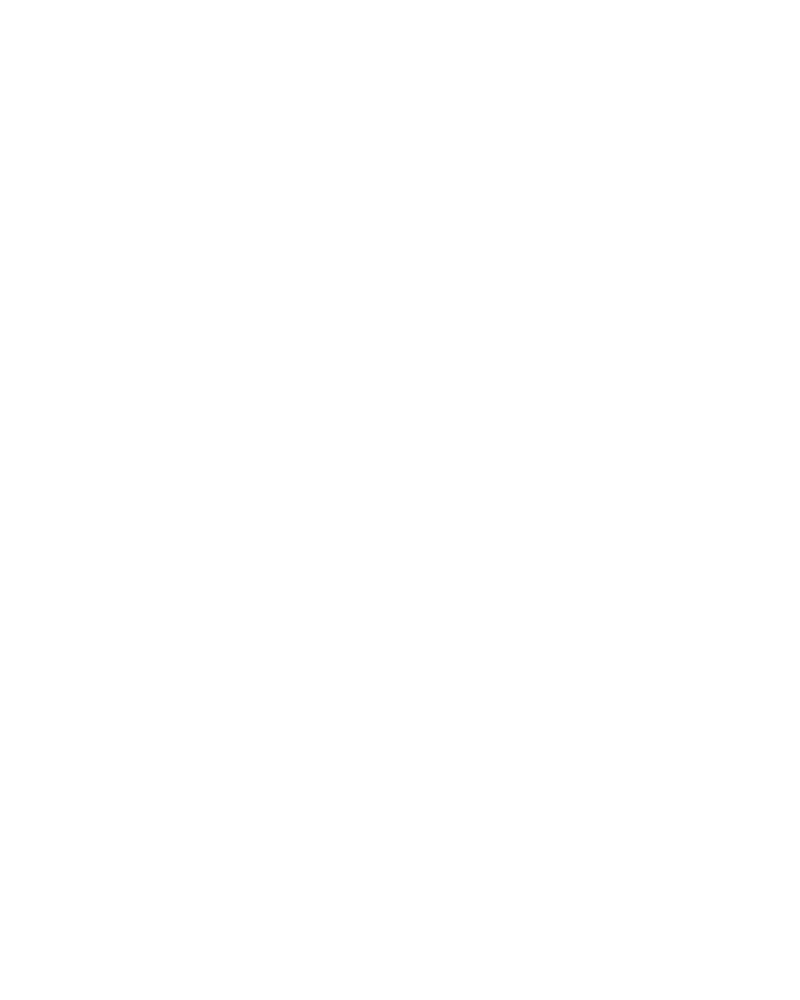

In [9]:
sn.load_mangledspec()
sn.plot_mangledspec()

In [10]:
# snname = "SN1993J" ## POOR FIT IN B
# snname = "SN1994I" ## data/spec/SN1994I/1994I_6.69.txt is too short
# snname = "SN1996cb"## Good - best example of uncertainties
# snname = "SN1998bw"
# snname = "SN1999dn"## Poor fit in B - unconstrained rise
# snname = "SN2002ap"## Poor fit post-max in B
# snname = "SN2003jd"
# snname = "SN2004aw"## Poor fit in B - unconstrained rise
# snname = "SN2005bf"## Weirdo - not bad fit, but not great
snname = "SN2005hg"## Poor I-spectra
# snname = "SN2006aj"## Good even with bump in R
# snname = "SN2007C" ## Good - Sparse phot pre max
# snname = "SN2007Y"
# snname = "SN2007uy"## Perfect!
# snname = "SN2007gr"## Poor fit to B-band post-peak
# snname = "SN2008D" ## Early bump drives fit - poor around peak
# snname = "SN2008bo"
# snname = "SN2008ax"## Poor fit around peak
# snname = "SN2009bb"
# snname = "SN2009er"## poor fit - NO PRE-MAX BESSELLB
# snname = "SN2009iz"
# snname = "SN2009jf"
# snname = "SN2010al" 
# snname = "SN2010as"## NEED LIST FILE AND SPEC CALIBRATED
# snname = "SN2011bm"
# snname = "SN2011dh"## poor fit around peak
# snname = "SN2011ei"## B blows up
# snname = "SN2011fu" ## Huge pre-max burst missed in all bands, phot uncertainties too small
# snname = "SN2012ap"
# snname = "SN2013ge"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
# sn.load_spec()
sn.check_overlaps()
print(sn.name)

SN2005hg


<IPython.core.display.Javascript object>


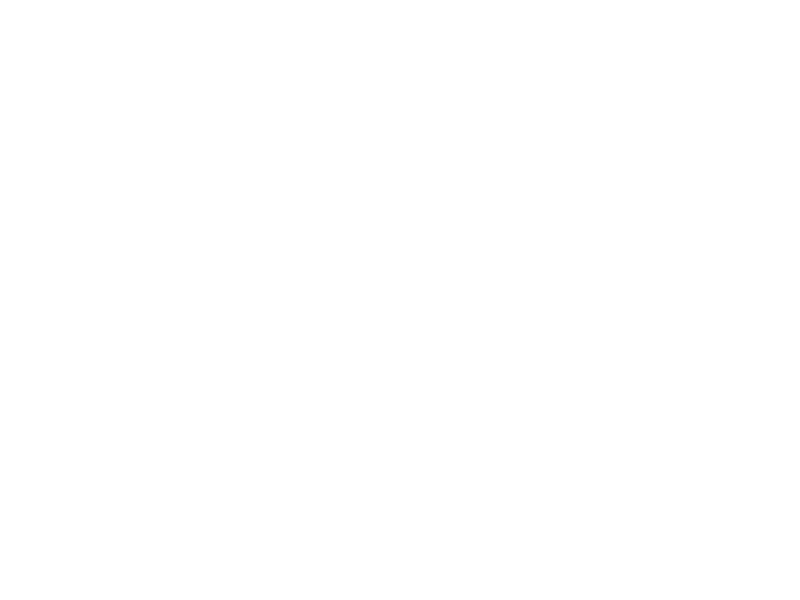

In [11]:
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")
sn.plot_lc(xextent=60)

In [12]:
# sn.plot_spec()

In [13]:
# sn.load_mangledspec(verbose = True)

In [14]:
# sn.plot_mangledspec()

In [15]:
# for s in sn._mangledspeclist:
#     print(s)

In [16]:
# sn.mangledspec["SN1994I_49457.990000.spec"].plot()

In [17]:
# specobj.data.meta['comments']

In [18]:
reload(pcc.classes)

<module 'pycoco.classes' from '/Users/berto/Code/verbose-enigma/pycoco/classes.py'>

In [19]:
snname = "SN2011dh"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec(verbose = True)

SN2011dh
loading mangledspec
0 SN2011dh_55715.030000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec
['data/spec/SN2011dh/2011dh_-17.67.txt']
[0]
1 SN2011dh_55716.030000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec
['data/spec/SN2011dh/2011dh_-16.67.txt']
[1]
2 SN2011dh_55717.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec
['data/spec/SN2011dh/2011dh_-15.68.txt']
[2]
3 SN2011dh_55718.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec


/Users/berto/Code/verbose-enigma/pycoco/classes.py:221: UserWarning: WARNING: You passed something that was <class 'numpy.str_'>This might go wrong.
  StringWarning(filename)


Reading /Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec
['data/spec/SN2011dh/2011dh_-14.68.txt']
[3]
4 SN2011dh_55719.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec
['data/spec/SN2011dh/2011dh_-13.68.txt']
[4]
5 SN2011dh_55720.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec
['data/spec/SN2011dh/2011dh_-12.68.txt']
[5]
6 SN2011dh_55721.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec
['data/spec/SN2011dh/2011dh_-11.68.txt']
[]
7 SN2011dh_55722.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55722.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55722.020000.spec
['data/spec/SN2011dh/2011dh_-10.68.txt']
[6]
8 SN2011dh_55724.010000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55724.010000.spec
Reading /Users/berto/Code/CoCo/

<IPython.core.display.Javascript object>


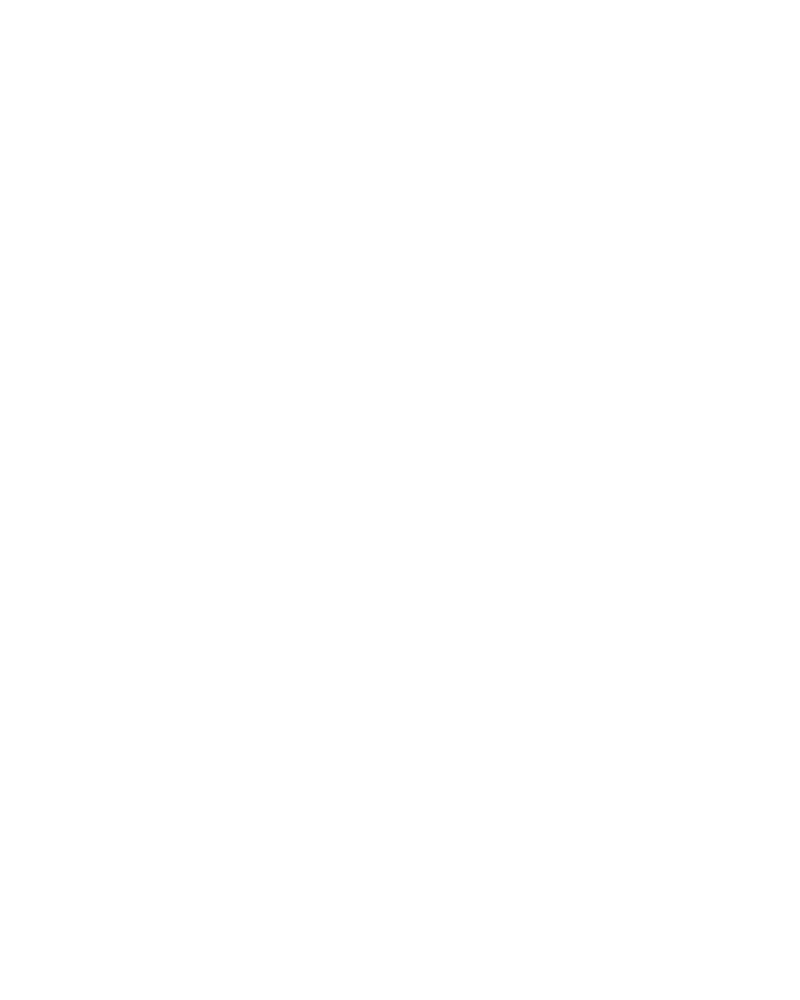

AttributeError: 'specfitClass' object has no attribute 'mjd_obs'

In [20]:
sn.plot_mangledspec()

In [ ]:
snname = "SN2009er"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec()

In [ ]:
sn.plot_mangledspec()

In [ ]:

# filenamedat = "/Users/berto/data/DES/des_real_01250017_smp_data.dat"
